# Task 3

## General instructions

First, update the following cell to have a link to your Homework 1 GitHub repository

https://github.com/hazelvaq/eds220-hwk-2.git 

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in csv format and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average Salmon Catches in Alaska Regions from 1878 to 1997'}, xlabel='Region', ylabel='Salmon Catches'>

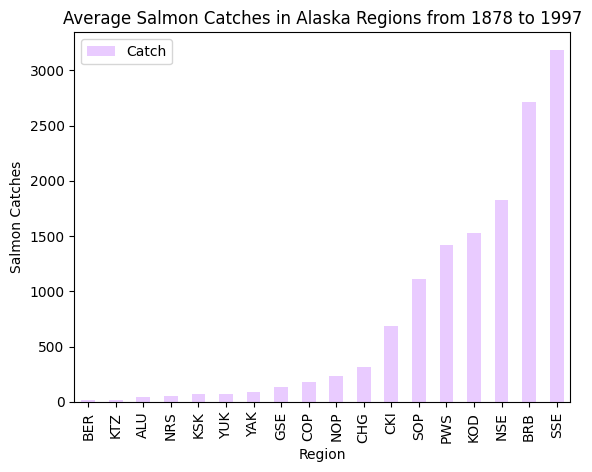

In [1]:
# import pandas as pd
import pandas as pd

# import data 
catch_original = pd.read_csv('salmon_data.csv')

# Update dataframe to not have notesRegCode column
catch_original = catch_original.drop(columns = ['notesRegCode'])

# Update value of I to 1 knowing that it is at 400 index 
catch_original.at[400,'Catch'] = 1

# Update the Catch colum datatype to int64
catch_original.Catch = catch_original.Catch.astype('int64')

# Average catch per region across the years dataframe
average_catch = pd.DataFrame(catch_original.groupby('Region').Catch.mean()).reset_index()


# Bar graph of average salmon catch across regions from 1878 to 1997
average_catch.sort_values(by = ['Catch']).plot(kind = 'bar', # bar graph set
                  x = 'Region', #x-axis
                  y = 'Catch', #y-axis
                  ylabel = 'Salmon Catches', # y-axis label
                  title = "Average Salmon Catches in Alaska Regions from 1878 to 1997", # title
                  color = '#E9CBFF'
                )

## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [15]:
# import pandas as pd
import pandas as pd

# import data 
catch_original = pd.read_csv('salmon_data.csv')

# head of salmon data 
catch_original.head()


,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 2
In the next cell:
1. Print the unique values of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [16]:
# 1. Unique values of notesRegCode column
print(catch_original.notesRegCode.unique())

# 2. Update dataframe to not have notesRegCode column
catch_original = catch_original.drop(columns = ['notesRegCode'])

# check column is removed
catch_original.head()

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [17]:
# check data types of columns
catch_original.dtypes

# ANSWER: the Catch column is an object when it should be an integer so this is unexpected

Region     object
Year        int64
Species    object
Catch      object
dtype: object

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [5]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
catch_original.Catch.astype('int64') # is this suppose to be catch_original

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. 

In [6]:
# Find the row(s) that contain I in the Catch column
catch_original[(catch_original.Catch == 'I')]

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [7]:
# Update value of I to 1 knowing that it is at 400 index 
catch_original.at[400,'Catch'] = 1

# verify the value was changed
catch_original.at[400,'Catch']

1

## 7
In the next cell:

1. Update the Catch column in `catch_original` to be of type `int64`.
2. Check the dtypes of the columns.

In [8]:
# Update the Catch colum datatype 
catch_original.Catch = catch_original.Catch.astype('int64')

# check the dtypes of the columns
catch_original.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [13]:
# Average catch per region dataframe
average_catch = pd.DataFrame(catch_original.groupby('Region').Catch.mean()).reset_index()

# check new dataframe has the averages
average_catch

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<AxesSubplot:title={'center':'Average Salmon Catches in Alaska Regions from 1878 to 1997'}, xlabel='Region', ylabel='Salmon Catches'>

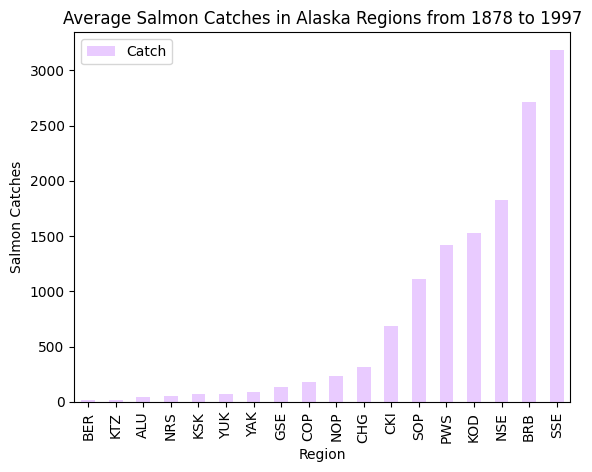

In [12]:
# Bar graph
average_catch.sort_values(by = ['Catch']).plot(kind = 'bar', # bar graph set
                  x = 'Region', #x-axis
                  y = 'Catch', #y-axis
                  ylabel = 'Salmon Catches', # y-axis label
                  title = "Average Salmon Catches in Alaska Regions from 1878 to 1997", # title
                  color = '#E9CBFF'
                )

## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.